In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## By Date

In [17]:
# Read data files
central = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'Central Region')
east = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'East Region')
north_central = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Central')
north_coastal = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Costal')
north_inland = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Inland')
south = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'South Region')

# Set headers
central.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
east.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
north_central.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
north_coastal.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
north_inland.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
south.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']

# Transform data to datetime format
central['Date'] = pd.to_datetime(central['Date'])
east['Date'] = pd.to_datetime(east['Date'])
north_central['Date'] = pd.to_datetime(north_central['Date'])
north_coastal['Date'] = pd.to_datetime(north_coastal['Date'])
north_inland['Date'] = pd.to_datetime(north_inland['Date'])
south['Date'] = pd.to_datetime(south['Date'])

### Visualization

Text(0.5, 1.0, 'Case Count (Raw)')

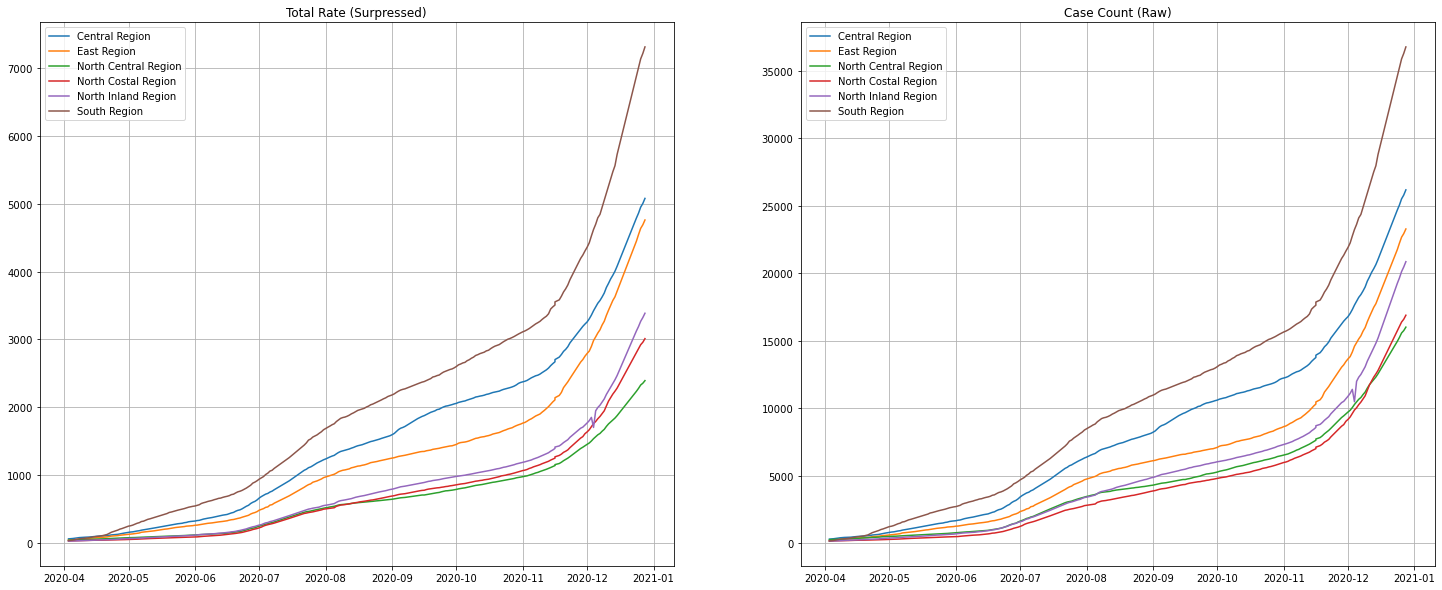

In [37]:
# Plot raw and total cases
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
ax1.plot(central['Date'], central['Total Rate (Suppressed)'], label = 'Central Region')
ax1.plot(east['Date'], east['Total Rate (Suppressed)'], label = 'East Region')
ax1.plot(north_central['Date'], north_central['Total Rate (Suppressed)'], label = 'North Central Region')
ax1.plot(north_coastal['Date'], north_coastal['Total Rate (Suppressed)'], label = 'North Costal Region')
ax1.plot(north_inland['Date'], north_inland['Total Rate (Suppressed)'], label = 'North Inland Region')
ax1.plot(south['Date'], south['Total Rate (Suppressed)'], label = 'South Region')
ax1.grid()
ax1.legend()
ax1.set_title('Total Rate (Surpressed)')

ax2.plot(central['Date'], central['Case Count (Raw)'], label = 'Central Region')
ax2.plot(east['Date'], east['Case Count (Raw)'], label = 'East Region')
ax2.plot(north_central['Date'], north_central['Case Count (Raw)'], label = 'North Central Region')
ax2.plot(north_coastal['Date'], north_coastal['Case Count (Raw)'], label = 'North Costal Region')
ax2.plot(north_inland['Date'], north_inland['Case Count (Raw)'], label = 'North Inland Region')
ax2.plot(south['Date'], south['Case Count (Raw)'], label = 'South Region')
ax2.grid()
ax2.legend()
ax2.set_title('Case Count (Raw)')

In [35]:
# Count daily cases
central_daily_total = central['Total Rate (Suppressed)'].diff()
central_daily_raw = central['Case Count (Raw)'].diff()
east_daily_total = east['Total Rate (Suppressed)'].diff()
east_daily_raw = east['Case Count (Raw)'].diff()
north_central_daily_total = north_central['Total Rate (Suppressed)'].diff()
north_central_daily_raw = north_central['Case Count (Raw)'].diff()
north_coastal_daily_total = north_coastal['Total Rate (Suppressed)'].diff()
north_coastal_daily_raw = north_coastal['Case Count (Raw)'].diff()
north_inland_daily_total = north_inland['Total Rate (Suppressed)'].diff()
north_inland_daily_raw = north_inland['Case Count (Raw)'].diff()
south_daily_total = south['Total Rate (Suppressed)'].diff()
south_daily_raw = south['Case Count (Raw)'].diff()

Text(0.5, 1.0, 'Daily Case Count (Raw)')

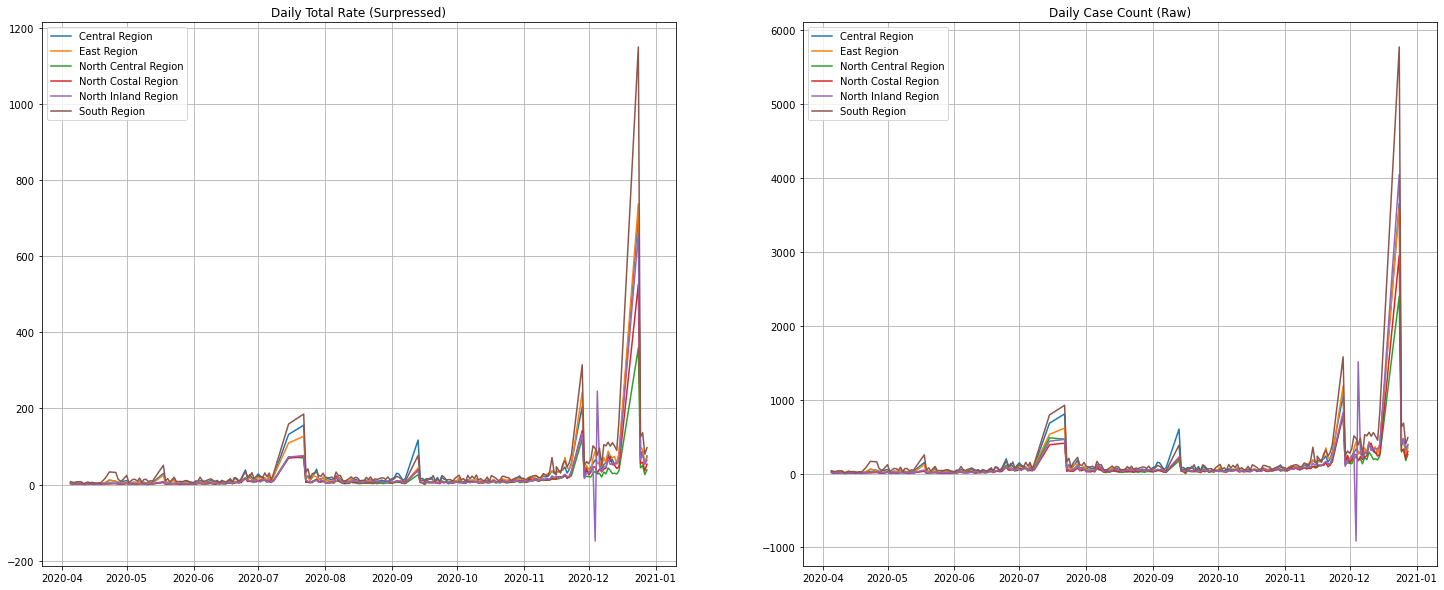

In [38]:
# Plot Raw and Total daily cases
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
ax1.plot(central['Date'], central_daily_total, label = 'Central Region')
ax1.plot(east['Date'], east_daily_total, label = 'East Region')
ax1.plot(north_central['Date'], north_central_daily_total, label = 'North Central Region')
ax1.plot(north_coastal['Date'], north_coastal_daily_total, label = 'North Costal Region')
ax1.plot(north_inland['Date'], north_inland_daily_total, label = 'North Inland Region')
ax1.plot(south['Date'], south_daily_total, label = 'South Region')
ax1.grid()
ax1.legend()
ax1.set_title('Daily Total Rate (Surpressed)')

ax2.plot(central['Date'], central_daily_raw, label = 'Central Region')
ax2.plot(east['Date'], east_daily_raw, label = 'East Region')
ax2.plot(north_central['Date'], north_central_daily_raw, label = 'North Central Region')
ax2.plot(north_coastal['Date'], north_coastal_daily_raw, label = 'North Costal Region')
ax2.plot(north_inland['Date'], north_inland_daily_raw, label = 'North Inland Region')
ax2.plot(south['Date'], south_daily_raw, label = 'South Region')
ax2.grid()
ax2.legend()
ax2.set_title('Daily Case Count (Raw)')

## By Age

In [51]:
def get_file_path(dir):
    '''
    Get file paths of all files in a directory.
    '''

    temp = []
    for filename in os.listdir(dir):
        if filename.endswith(".csv"):
            temp.append(os.path.join(dir, filename))
        else:
            print("Skipping file: " + filename)

    return temp

In [55]:
file_paths_age = get_file_path('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data_unscrambled/Data_by_age')

In [64]:
t = pd.read_csv(file_paths_age[0])
for index, row in t.iterrows():
    if row[0] == 'Central Region':
        print(row)

Geography                                        Central Region
Allocated\nAge70_79\nCase\nCount\n(Raw)                   114.0
COVID-19\nTotal\nAge70_79\nRate\n(Suppressed)             432.2
Date                                                  6/17/2020
Name: 3, dtype: object


In [ ]:
for file in file_paths_age:
    df = pd.read_csv(file)

    if df['Geography'] == 'Central':
        